In [69]:
from getdata import GetData

In [70]:
# API 인증키
key = "D9C2C32A-110D-3F33-846F-A831EE3AF020"
# 배경지도 (csv)
background = './data/GSBD_DG_geo.csv'
# 창고 위치 (geojson)
warehouse = './data/GSBD_DG_refrigerated_warehouse.geojson'
# 경사도 정보 (gpkg)
slope = './data/polygonized.gpkg'

In [71]:
# GetData 인스턴스 생성
data = GetData(key, background, warehouse, slope)

In [72]:
danger = data.get_lon_lat("dng")
restricted = data.get_lon_lat("res")
prohibited = data.get_lon_lat("prh")

https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISDNGC&columns=dng_lbl_1,dng_lbl_2,dng_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISRESC&columns=restricted,res_lbl_1,res_lbl_2,res_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISPRHC&columns=prohibited,prh_lbl_1,prh_lbl_2,prh_lbl_3,prh_lbl_4,prh_typ,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=


In [73]:
restricted_rev = data.get_lat_lon("res")
danger_rev = data.get_lat_lon("dng")
prh_rev = data.get_lat_lon("prh")

https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISRESC&columns=restricted,res_lbl_1,res_lbl_2,res_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISDNGC&columns=dng_lbl_1,dng_lbl_2,dng_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISPRHC&columns=prohibited,prh_lbl_1,prh_lbl_2,prh_lbl_3,prh_lbl_4,prh_typ,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=


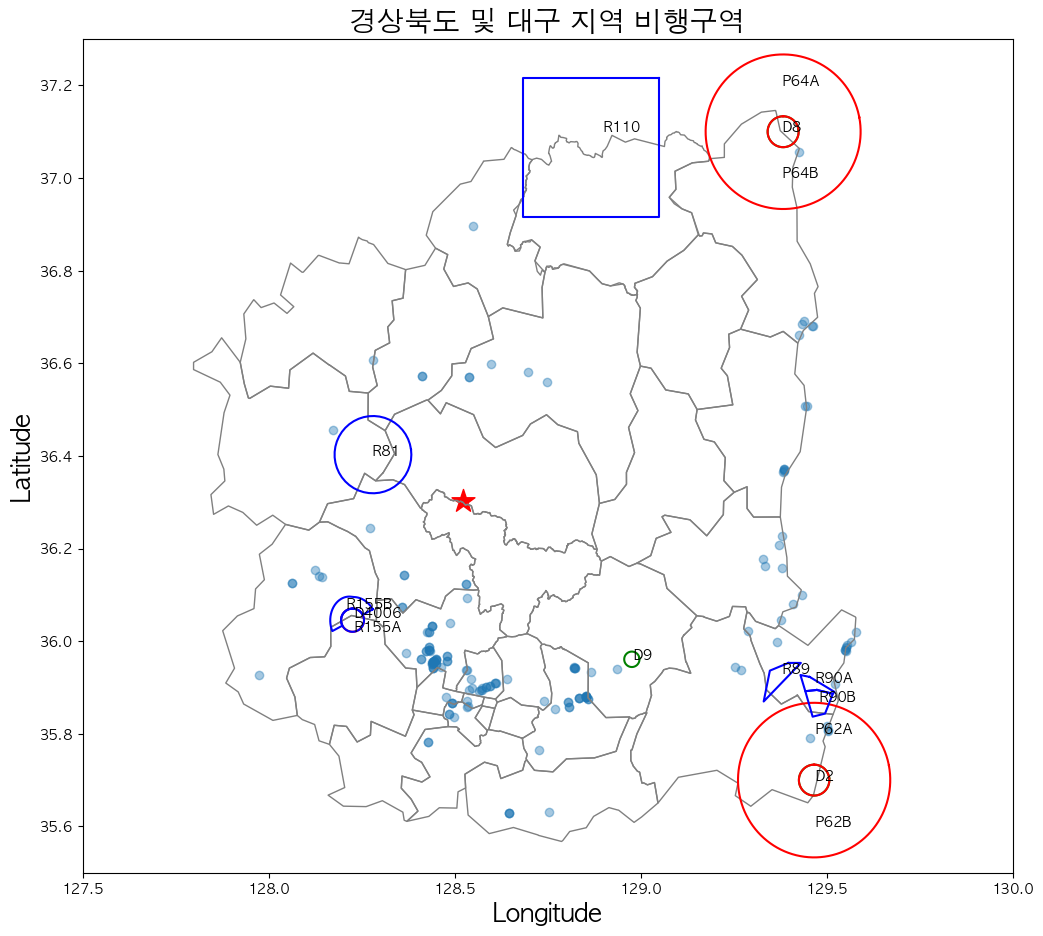

In [74]:
# save = True: 사진 저장
data.plt_visualize(danger, prohibited, restricted, slope = False, save=False)

# **K-means algorithm**

## K = 1

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


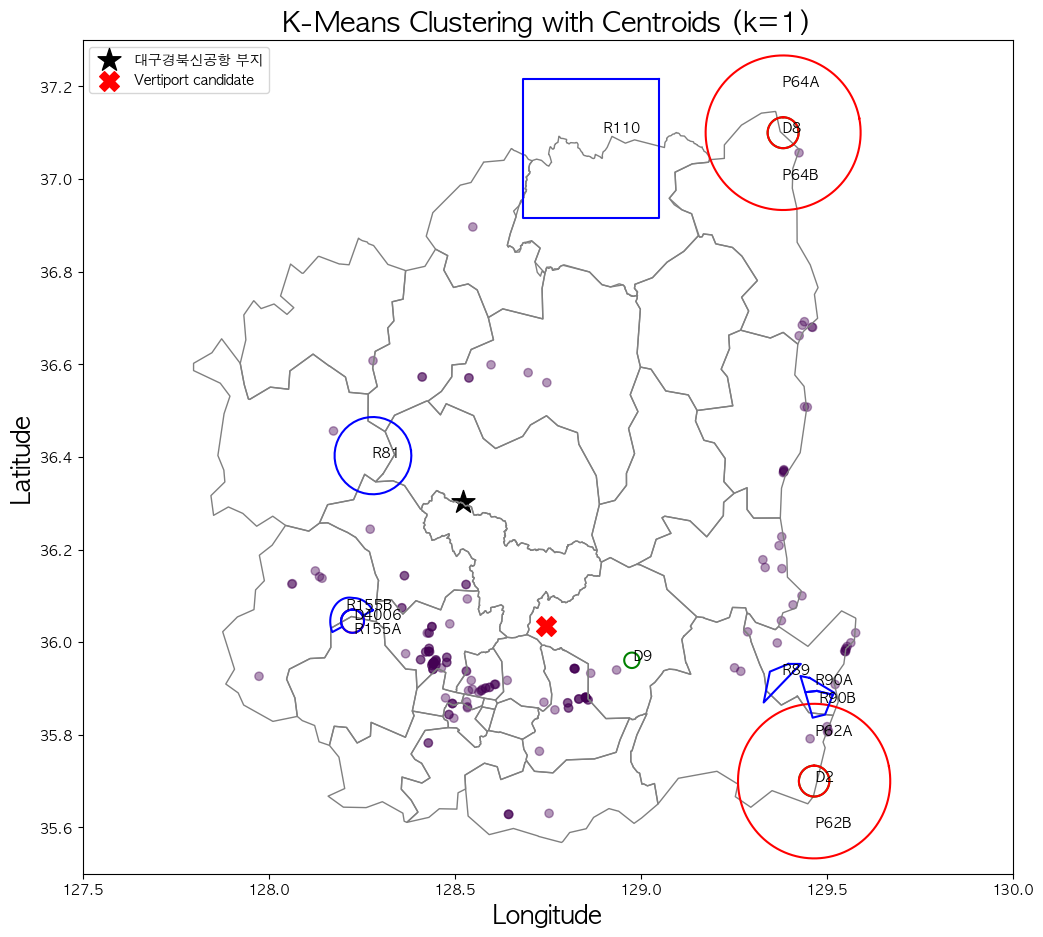

In [7]:
warehouse_df1, centroids_df1 = data.Kmeans(1, danger, prohibited, restricted, slope = False, save=True)

In [17]:
# 선 클릭하면 해당 제한구역의 이름 확인 가능
data.folium_visualize(5000, centroids_df1, prh_rev, restricted_rev, danger_rev)

## K = 2

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


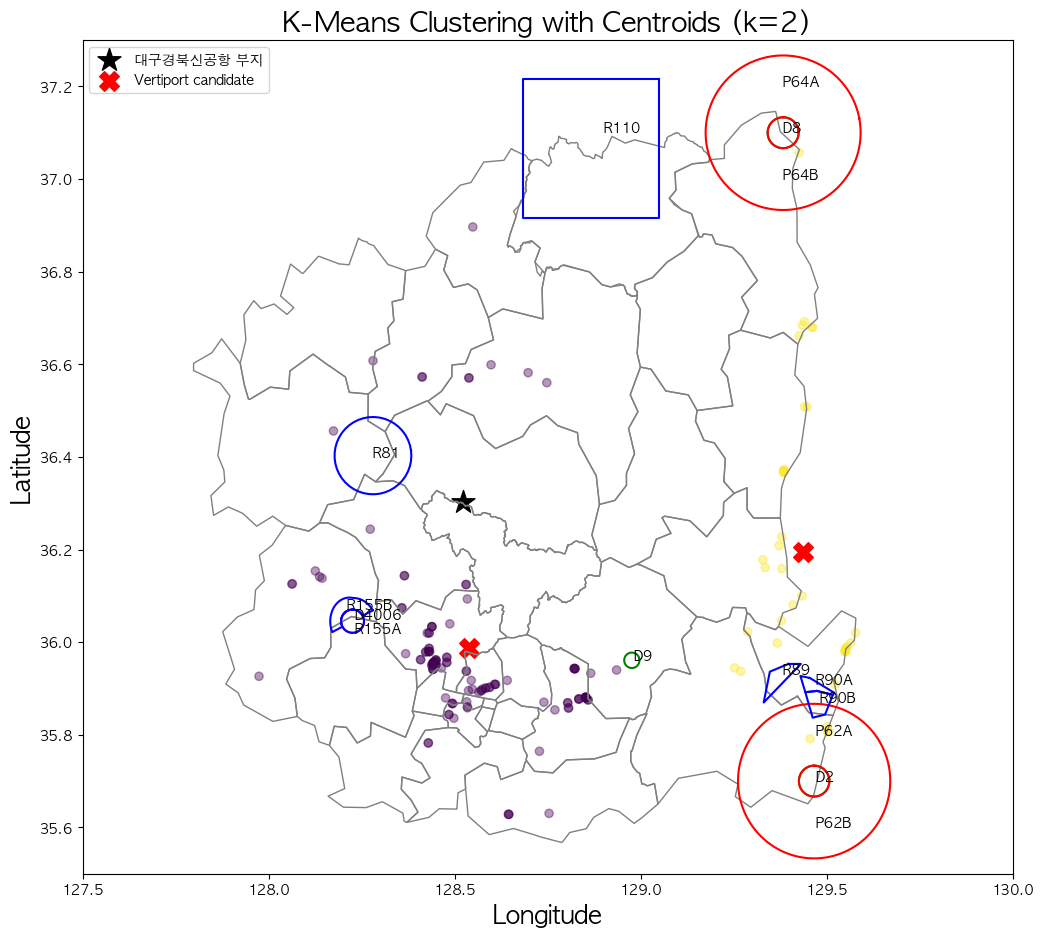

In [7]:
warehouse_df2, centroids_df2 = data.Kmeans(2, danger, prohibited, restricted, slope = False, save=True)

In [10]:
data.folium_visualize(5000, centroids_df2, prh_rev, restricted_rev, danger_rev)

## K = 3

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


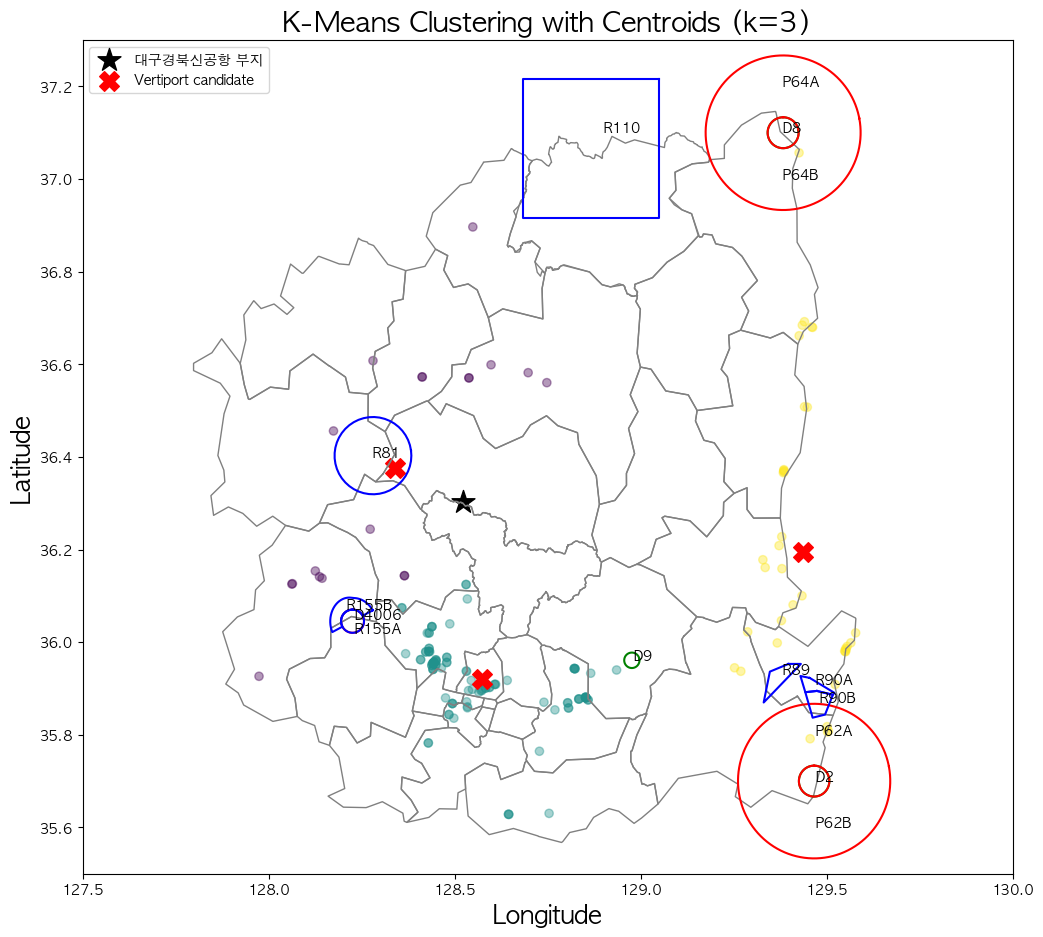

In [7]:
warehouse_df3, centroids_df3 = data.Kmeans(3, danger, prohibited, restricted, slope = False, save=False)

In [8]:
data.folium_visualize(5000, centroids_df3, prh_rev, restricted_rev, danger_rev)

## K = 4

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


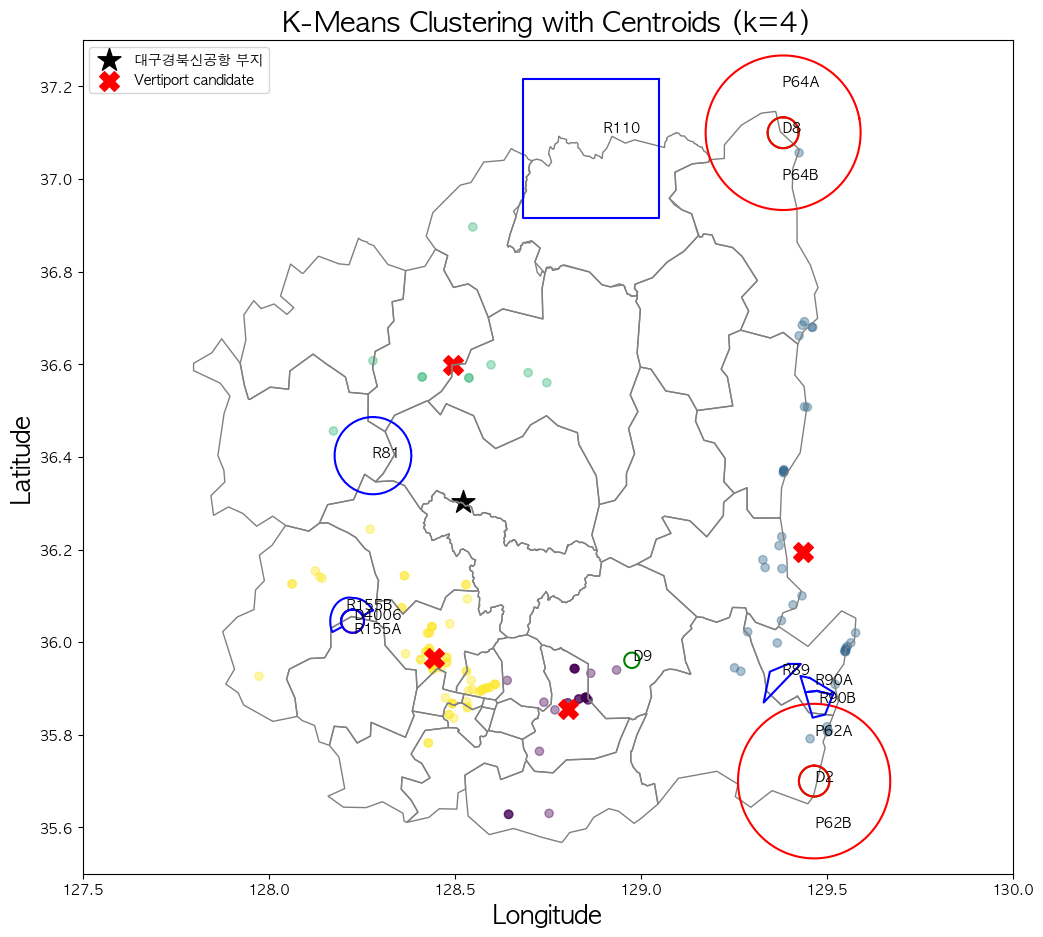

In [12]:
warehouse_df4, centroids_df4 = data.Kmeans(4, danger, prohibited, restricted, slope = False, save=True)

In [13]:
data.folium_visualize(5000, centroids_df4, prh_rev, restricted_rev, danger_rev)

## K = 5

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


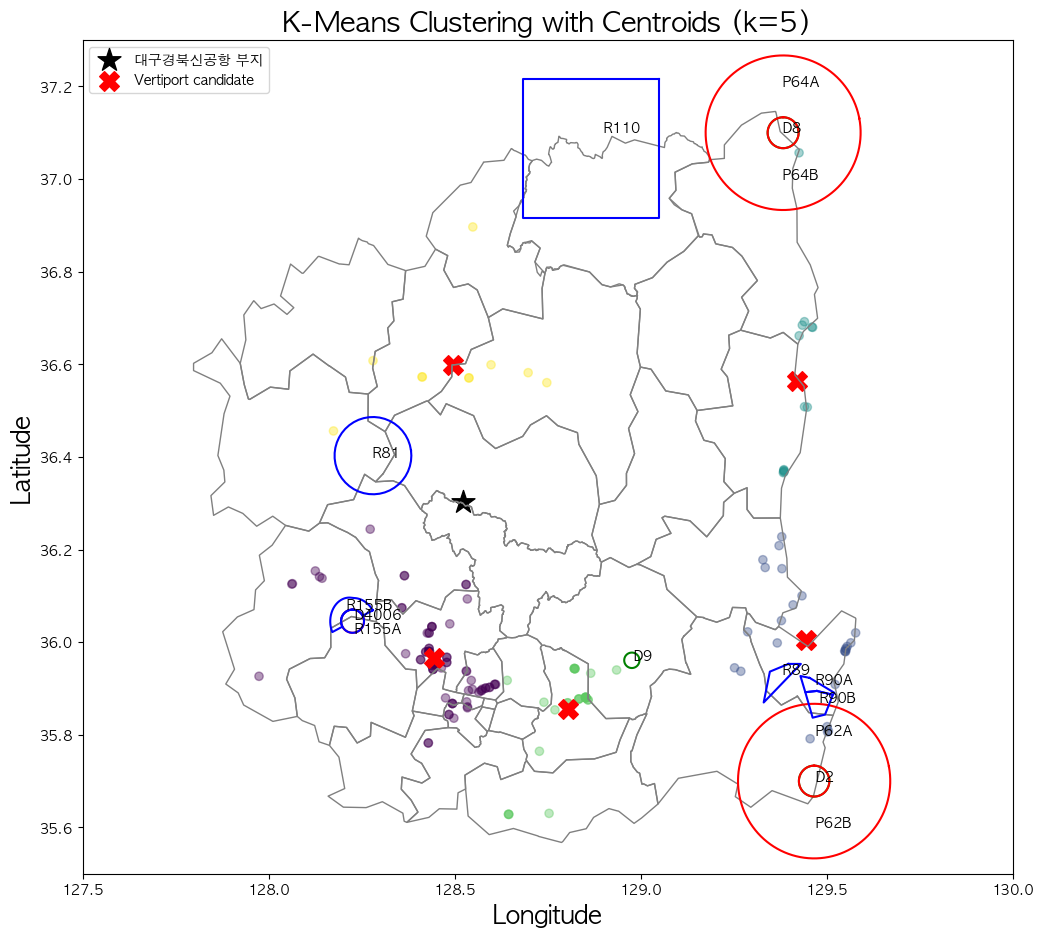

In [14]:
warehouse_df5, centroids_df5 = data.Kmeans(5, danger, prohibited, restricted, slope = False, save=True)

In [16]:
data.folium_visualize(5000, centroids_df5, prh_rev, restricted_rev, danger_rev)

## K = 6

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


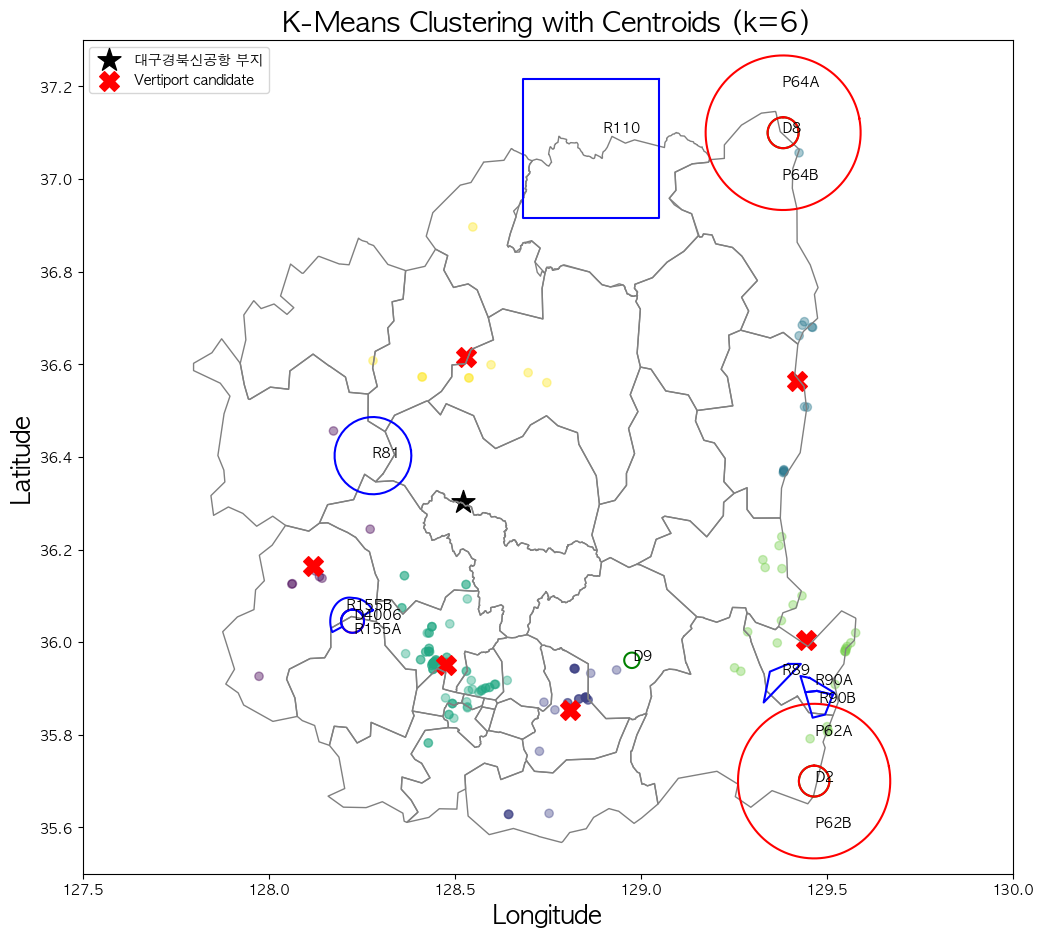

In [17]:
warehouse_df6, centroids_df6 = data.Kmeans(6, danger, prohibited, restricted, slope = False, save=True)

In [18]:
data.folium_visualize(5000, centroids_df6, prh_rev, restricted_rev, danger_rev)

# **Determination of the optimal K for K-Means algorithm**

## Silhouette Method

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

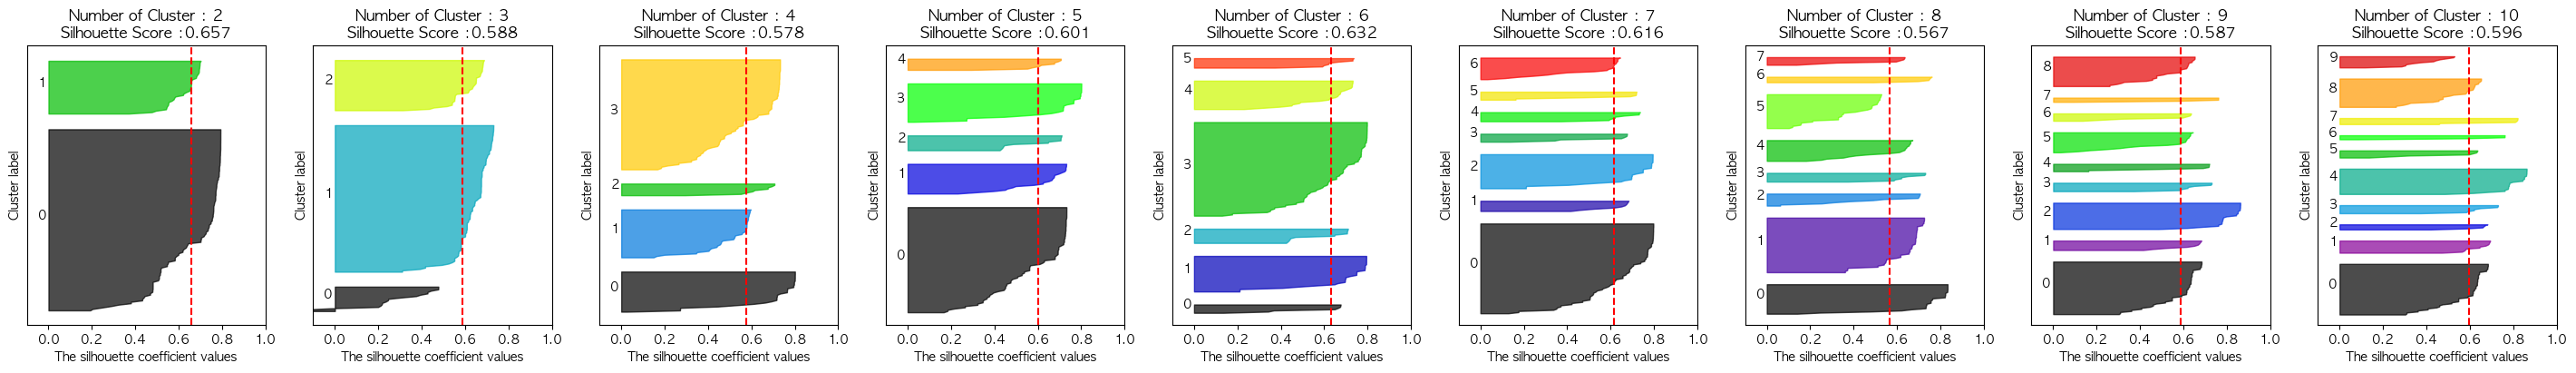

In [6]:
sil_values, sil_avg = data.silhouette(10, save = True)

## **Elbow method**

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

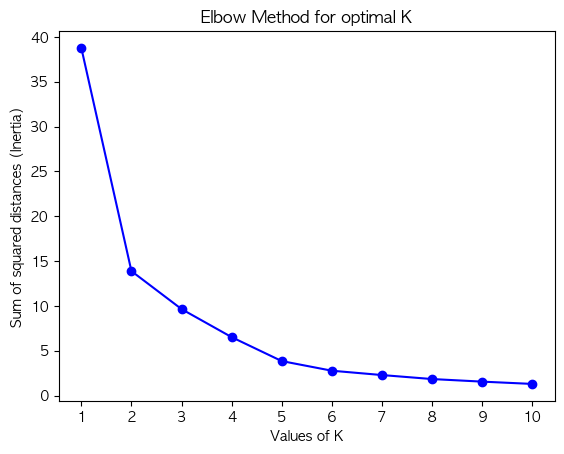

<Figure size 640x480 with 0 Axes>

In [6]:
data.elbow(10, save= True)

In [12]:
warehouse_df3

,lon,lat,cluster
0,127.974419,35.926329,0
1,128.064241,36.126308,0
2,128.062673,36.125406,0
3,128.740345,35.870344,1
4,128.834546,35.877169,1
...,...,...,...
161,128.444991,35.956688,1
162,128.442744,35.954255,1
163,128.449856,35.961823,1
164,129.434048,36.100115,2


In [35]:
warehouse_df3.shape

(166, 3)

In [61]:
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd

distances = np.array(0)
for k in range(len(centroids_df3)):
    distance = pairwise_distances(warehouse_df3[warehouse_df3['cluster']==k], centroids_df3[centroids_df3["cluster"]==k])
    distances = np.append(distances, distance)
distances = np.delete(distances, 0, axis = 0)

distances

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 4 while Y.shape[1] == 3